In [ ]:
# Processamento das imagens da pasta data_oasis1/raw:
# 1 - Desempacotamento das imagens em formato img/hdr
# 2 - Cópia das novas imagens na pasta data_oasis1/interim

In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image
from scipy.stats import entropy
from pathlib import Path
from scipy import histogram
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def get_folder_names(directory):
    return [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
def get_file_names(directory):
    return [name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]

directory = '/content/gdrive/MyDrive/IA901A_Projeto/data/interim/oasis1'  # replace with your directory
labels = get_folder_names(directory)
print(folder_names)

['0.0', '0.5', '1.0', '2.0']


In [ ]:
ROOT_interim = Path('/content/gdrive/MyDrive/IA901A_Projeto/data/interim/oasis1/')
filenames = get_file_names(ROOT_interim/'0.0'/f'OAS1_{1:04}_MR1')
filenames

['OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc.hdr',
 'OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc.img']

In [ ]:

ROOT_interim = Path('/content/gdrive/MyDrive/IA901A_Projeto/data/interim/oasis1/')
labels=['0.0']
# i = 1 from the example
for j in labels:
  folder_names = get_folder_names(ROOT_interim/j)
  #for i in len(folder_names):
  for i in [0,1]:
    file_names = get_file_names(ROOT_interim/j/folder_names[i])
    analyzefilename = ROOT_interim/j/folder_names[i]/file_names[0]
    X = nib.load(analyzefilename).get_fdata()

    imagefoldername = ROOT_interim/j/folder_names[i]/'slices'
    imagefoldername.mkdir(parents=True, exist_ok=True)

    val = np.zeros((X.shape[2], 1))
    print(X.shape)
    for l in range(X.shape[2]):
        image_slice = X[:,:,l]
        image_slice = np.nan_to_num(image_slice)
        max_val = np.nanmax(image_slice) if np.nanmax(image_slice) != 0 else 1
        hist = np.histogram(image_slice.flatten() / max_val, density=True)
        val[l] = entropy(hist[0])
    Xind = np.argsort(val.flatten())[::-1]
    print(Xind)
    for n in range(0,12):
        img = Image.fromarray(np.squeeze(X[:,:,Xind[n]]))
        img = img.convert("L") # convert to grayscale
        img.save(imagefoldername / f'{n+1:02}.jpg')


(176, 208, 176, 1)
[ 80  86  78  81  76  77  79  82  72  75  84  74  85  83  73  88  71  70
  87  89  91  68  69  90  92  93  96  94  67  97  95  98  99 100 102 101
 103 104 105 107 106  66  65  64 109 110 108 112 111 113 114 115 116  62
 117 118 119  56  63 120  55  61 121  54  57 122 123  58  59 124  60 125
  50  51  53 126 127  52 128  49 129  45  48  47 130 131 132  46  44  41
  40 133 134  43 135  42  39 136 137  38 138 139  34  37  36  33  31  35
 140  32 141  30  29 142  28 143  27  26 144  24  25  23 145  22  21 146
  20  19 147  18  17 148 149  16  15 150 151  14  13  12  11  10   9   8
   7   2   6   5   4   3   1 175 174 152 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153   0]
(176, 208, 176, 1)
[ 81  80  73  83  71  82  84  72  74  88  85  86  70  89  87  90  69  68
  91  92  67  79  93  77  94  78  95  65  64  96  97  98  66  76  75  99
 100 101 102  63 103  62 104 106 105 107 108 109 110 111 112 114 113 115
 116  61 117 118 119  52 120

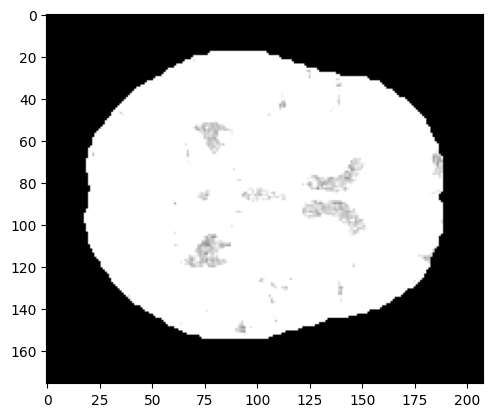

In [ ]:
image_slice_2d = np.squeeze(X[:,:,80])

# Normalize the slice to the range 0-255 and convert it to uint8

# Now create the image
img = Image.fromarray(image_slice_2d)
plt.imshow(img)

In [ ]:
imagefoldername = ROOT_interim/j/folder_names[i]/'slices'
imagefoldername.mkdir(parents=True, exist_ok=True)

In [ ]:
imagefoldername

PosixPath('/content/gdrive/MyDrive/IA901A_Projeto/data/interim/oasis1/0.0/OAS1_0002_MR1/slices')

In [ ]:
try:
    imagefoldername.mkdir(parents=True, exist_ok=True)
except Exception as e:
    print(f"Error creating directory {imagefoldername}: {e}")